<a href="https://colab.research.google.com/github/claraagu/ma_thesis_VLD/blob/main/pre_study_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-study for Master Thesis project *The more detailed, the more reliable?*

The project is divided into three parts:


* Data Preparation
* Feature Extraction
* Statistical Analysis

If mounted to drive, produces a folder with (...)


# Data Preparation

Load the data from csv file. Plot histograms of distributions of the dataset.

In [ ]:
'''Make imports for data preparation'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''Mount to Google drive'''
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
'''Load data'''

file_path = '/content/GKT_dataset.csv' # Assumes the csv file is already uploaded to Colab

data = pd.read_csv(file_path, encoding='iso-8859-1', delimiter=';', usecols=["Age", "Gender", "Statement", "True or False", "Believed or Not", "Confession or Denial", "Prolific or Normal", "Strategy"])


women = len([word for word in data["Gender"] if word=="Kvinna"])
print(women) # Should say 120

120


In [ ]:
'''Remove line breaks in statements'''

def remove_newline(statement):
  # unstripped_
  # new_statement = statement.strip('\n')
  return statement.strip('\n')

data['Statement'] = data['Statement'].apply(remove_newline)

In [ ]:
'''Insert combined label columns'''  # To make later analysis easier

data['Label x2'] = data['True or False'] + data['Confession or Denial']
data['Label x3'] = data['Label x2'] + data['Believed or Not']

In [ ]:
data.head()

,Age,Gender,Statement,Strategy,True or False,Confession or Denial,Believed or Not,Prolific or Normal,Label x2,Label x3
0,18,Kvinna,Ja jag var på väg hem efter en lång dag på job...,Detaljer och att prata/skriva på ett lugnt sät...,F,C,B,PROLIFIC,FC,FCB
1,29,Man,"Ja, jag vet faktiskt, och jag skäms jättemycke...","Detaljrikedom, skam och bakgrundshistoria",F,C,B,PROLIFIC,FC,FCB
2,23,Man,"Ja, det var jag som tog paketet. Jag kom hem o...",Jag försökte beskriva känslor osv för att de s...,T,C,B,PROLIFIC,TC,TCB
3,18,Man,Jag kom hem igår kväll och såg ett paket ligga...,Jag beskrev en viss del av situationen sanning...,T,C,N,PROLIFIC,TC,TCN
4,50,Kvinna,"Jag kom hem framåt eftermiddagen, inte helt sä...",Jag försökte vara så tydligt som möjligt i min...,T,D,B,PROLIFIC,TD,TDB


<ipython-input-10-1b631660ea0d>:9: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.histplot(ax=ax, data=data, stat='count', x="True or False", hue=category, palette=sns.color_palette(color_palettes[i]), multiple="dodge", shrink=.8)
<ipython-input-10-1b631660ea0d>:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(ax=ax, data=data, stat='count', x="True or False", hue=category, palette=sns.color_palette(color_palettes[i]), multiple="dodge", shrink=.8)


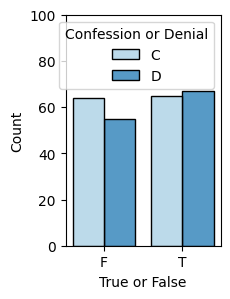

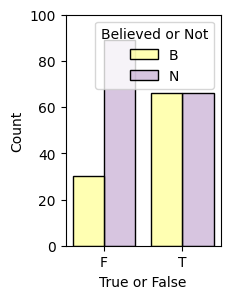

In [ ]:
'''Plot dataset distributions and save to drive'''

color_palettes = ['Paired', 'Paired_r']
filepath = "drive/My Drive/master_thesis/"

for i, category in enumerate(['Confession or Denial', 'Believed or Not']):
  fig, ax = plt.subplots(figsize=(2,3))
  ax.set_ylim(0,100)
  sns.histplot(ax=ax, data=data, stat='count', x="True or False", hue=category, palette=sns.color_palette(color_palettes[i]), multiple="dodge", shrink=.8)
  fig.savefig(filepath+"hist_dataset"+str(i)+".png")  # Problem: Crops axes labels for some reason

# Extraction of Cues/Features

In [ ]:
'''Imports and dependencies'''

# Install packages
!pip install spacy-transformers
!pip install vaderSentiment-swedish

# Download SpaCy model for Swedish
!python -m spacy download sv_core_news_lg

# Imports
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import spacy
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
from math import log2, log10

# Initialize models
bert_analyzer = pipeline('sentiment-analysis', model='marma/bert-base-swedish-cased-sentiment')  # BERT model for sentiment analysis
model = AutoModelForSequenceClassification.from_pretrained("KBLab/robust-swedish-sentiment-multiclass")  # KBLab BERT model
tokenizer = AutoTokenizer.from_pretrained("KBLab/megatron-bert-large-swedish-cased-165k")  # Tokenizer for KBLab BERT model
kbl_classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer) # KBLab BERT model for sentiment analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 32.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings t

config.json:   0%|          | 0.00/771 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/514 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/399k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/906 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/904k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

In [ ]:
!pip install spacy-transformers

In [ ]:
!python -m spacy download sv_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('sv_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Coding Cues/Features

In [ ]:
'''Length Cues'''

from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import spacy

nltk.download('punkt')

def length_n_tokens(statement):
  '''Calculates word (token) quantity'''
  tokenized_statement = word_tokenize(statement, language='swedish') # includes punctuation
  return len(tokenized_statement)

def length_avg_word_len(statement):
  '''Calculates average word (token) length'''
  tokenized_statement = word_tokenize(statement, language='swedish') # includes punctuation
  avg_word_len = sum(len(word) for word in tokenized_statement) / len(tokenized_statement)
  return avg_word_len

def length_avg_sent_len(statement):
  '''Calculates average sentence length (in tokens)'''
  sent_tokenized_statement = sent_tokenize(statement, language='swedish') # includes punctuation
  avg_sent_len = sum(len(word_tokenize(sent, language='swedish')) for sent in sent_tokenized_statement) / len(sent_tokenized_statement)
  return avg_sent_len

def length_n_sents(statement):
  '''Calculates sentence quantity'''
  sent_tokenized_statement = sent_tokenize(statement, language='swedish') # punctuation doesn't matter
  return len(sent_tokenized_statement)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
'''NER-tag and PoS-tag extraction corresponding to detail criterion'''

spacy_nlp = spacy.load("sv_core_news_lg")

def tag_density(statement, pos=None, ner=None):
  '''Calculates the density of a certain NER-tag or PoS-tag for a statement.
  Number of occurrences / statement length.'''
  # tokenize
  tokenized_statement = word_tokenize(statement, language='swedish')

  # pos-tag
  doc = spacy_nlp(statement)

  # assert that only unique tokens are counted for ner
  ner_tokens = []

  # count adjectives in the statement
  tag_count = 0
  for token in doc:
    # print(token, token.ent_type_)
    # print('---')

    # decide if pos or ner:
    if pos is not None:
      source = token.tag_
      tag = pos
    else:
      if token not in ner_tokens:
        source = token.ent_type_
        tag = ner
        ner_tokens.append(token)
      else:
        source = []

    if tag in source:
      # print(token, token.ent_type_)
      # print(token, token.tag_)
      tag_count += 1

  # count adjective density for whole statement
  tag_density = tag_count / len(tokenized_statement) # length of tokenized statement

  # return adjective density
  return tag_density

In [ ]:
# Test the pos-tag thing: What tags are this model attaching? What do they mean?
i_test = 30

# test_statement = data['Statement'][i_test]
# condition = data['True or False'][i_test], data['Confession or Denial'][i_test], data['Believed or Not'][i_test]

# test_statement = 'Jag vet inte vad jag ska säga. Dig. Honom. Vi säger att det är eran stol nu. Det här livet är mitt och stolen är min. För mig har det inte hänt. Du kanske vet. Poliserna, har ni sett något?'

# print(test_statement)
# print(condition)

# tag_density(test_statement, pos='JJ')
for i_test, test_statement in enumerate(data['Statement']):
# for test_statement in [test_statement]:
  test = tag_density(test_statement, pos='RG')
  if test != 0:
    condition = i_test, data['True or False'][i_test], data['Confession or Denial'][i_test], data['Believed or Not'][i_test], data['Age'][i_test], data['Gender'][i_test]
    print(condition, test_statement)
    print(test, '\n')

(8, 'F', 'C', 'B', 25, 'Man') Jag var på väg hem från jobbet och när jag gick in i trapphuset så noterar jag ett paket. Jag läser på paketet att det är levererat till min granne Leonard. Han beställer ofta hem prylar och verkar ha mycket pengar. Detta gör mig avundsjuk eftersom jag kan knappt få det att gå ihop ekonomiskt. När jag står där så bestämmer jag mig för att ta paketet eftersom företaget kommer ändå ersätta hans förlorade paket. Jag ser det som en win-win situation. Jag gömmer paketet under min säng och fortsätter mig dag. Senare på kvällen när jag slänger sopor så det jag min granne Mats stå vid ingången. Han berättar att Leonard paket har blivit stulet och att det är en dyr Mac dator. När jag går tillbaka in i lägenheten så känner jag ångest och skuld. Jag försöker söka på internet om straffet blir värre om saken man stulit är över en viss prissumma men jag kommer inte till någon större slutsats. Nästa dag så knackar två poliser på min dörr. Klumpen jag har i magen blir stö

In [ ]:
'''Content Word Diversity'''

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
swedish_stopwords = stopwords.words('swedish')

def content_word_diversity(statement): # Includes punctuation!! as non-stopwords
  '''Calculates content word diversity for a statement.
  Number of unique content words / statement length.'''
  # tokenize
  tokenized_statement = word_tokenize(statement, language='swedish')
  # print(len(tokenized_statement), ' '.join(tokenized_statement))

  # uncase statement
  uncased_statement = [token.lower() for token in tokenized_statement]

  # tokenized_statement.remove(swedish_stopwords)
  filtered_statement = list(filter(lambda i: i not in swedish_stopwords, uncased_statement))
  # print(len(filtered_statement), ' '.join(filtered_statement))

  # count unique words in the filtered statement
  unique_content_w = set(filtered_statement)
  content_diversity = len(unique_content_w) / len(filtered_statement)

  return content_diversity


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
'''Self-Distancing: Personal Pronouns'''

# We include only animate personal pronouns in subject and object forms, except for the plural which has no morphological distinction between inanimate and animate.

def first_person_density(statement):
  '''Calculates frequency of 1st person personal pronouns'''
  tokenized_statement = word_tokenize(statement, language='swedish')
  occurences = 0
  for token in tokenized_statement:
    if token.lower() in ['jag','mig','vi','oss']: # endast animata
      occurences += 1
  return occurences / len(tokenized_statement)

def second_person_density(statement):
  '''Calculates frequency of 2nd person personal pronouns'''
  tokenized_statement = word_tokenize(statement, language='swedish')
  occurences = 0
  for token in tokenized_statement:
    if token.lower() in ['du','dig','ni','er']: # endast animata
      occurences += 1
  return occurences / len(tokenized_statement)

def third_person_density(statement):
  '''Calculates frequency of 3rd person personal pronouns'''
  tokenized_statement = word_tokenize(statement, language='swedish')
  occurences = 0
  for token in tokenized_statement:
    if token.lower() in ['han', 'hon', 'hen', 'de', 'honom', 'henne', 'dem']: # may catch inanimate pronouns as well, since de/dem is the same for inanimate and animate objects
      occurences += 1
  return occurences / len(tokenized_statement)


In [ ]:
'''Type-Token Ratio'''

def type_token_ratio(statement):
  '''Calculates the ratio of different words.'''
  # tokenize
  tokenized_statement = word_tokenize(statement, language='swedish')
  # uncase
  uncased_statement = [token.lower() for token in tokenized_statement]
  # make set of tokens
  set_tokens = set(uncased_statement)
  # calculate type-token ratio - total number of different words / total number of words
  type_token_ratio = len(set_tokens) / len(uncased_statement)
  # return type_token_ratio
  return type_token_ratio

In [ ]:
# write code that calculates sentiment

!pip install vaderSentiment-swedish

In [ ]:
'''Sentiment Analysis: VaderSentiment'''

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

def v_sentiment(statement, valence=None):
  '''Returns the value of sentiment score for a given type of valence.
  Accepted valences: ['neg', 'neu', 'pos', 'compound']'''
  vs = vader_analyzer.polarity_scores(statement)
  # print(vs)
  return vs[valence]

# statement = data['Statement'][100]
# v_sentiment(statement, valence='neg')

In [ ]:
'''Sentiment Analysis: BERT base cased'''

from transformers import pipeline

bert_analyzer = pipeline('sentiment-analysis', model='marma/bert-base-swedish-cased-sentiment')

def bert_neg_sentiment(statement):
  try:
    output = bert_analyzer(statement)
  except:
    return 0

  if output[0]['label'] == 'NEGATIVE':
    return output[0]['score']
  else:
    return 0

def bert_pos_sentiment(statement):
  try:
    output = bert_analyzer(statement)
  except:
    return 0

  if output[0]['label'] == 'POSITIVE':
    return output[0]['score']
  else:
    return 0

# statement = data['Statement'][168]
# print(bert_neg_sentiment(statement))
# print(bert_pos_sentiment(statement))

In [ ]:
'''Sentiment Analysis: KBLab sentiment classification with BERT large'''

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

tokenizer = AutoTokenizer.from_pretrained("KBLab/megatron-bert-large-swedish-cased-165k")
model = AutoModelForSequenceClassification.from_pretrained("KBLab/robust-swedish-sentiment-multiclass")

kbl_classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Try is done to skip one statement which was too long for analysis (Problem)

def KBLab_pos_sentiment(statement):
  try:
    output = kbl_classifier(statement)
  except:
    return 0

  if output[0]['label'] == 'POSITIVE':
    return output[0]['score']
  else:
    return 0


def KBLab_neg_sentiment(statement):
  try:
    output = kbl_classifier(statement)
  except:
    return 0

  if output[0]['label'] == 'NEGATIVE':
    return output[0]['score']
  else:
    return 0


def KBLab_neu_sentiment(statement):
  try:
    # print('Trying...')
    output = kbl_classifier(statement)
  except:
    # print('Could not.')
    return 0

  if output[0]['label'] == 'NEUTRAL':
    # print('Returning output score for neutral.')
    return output[0]['score']
  else:
    # print('Label was not neutral, but:', output[0]['label'])
    return 0


In [ ]:
'''OVIX and LIX extractions'''

from math import log2, log10

def ordvar_idx(statement):
  '''Calculates word variation index OVIX.'''
  # log(tokens)/log(2-(log(types)/log(tokens)))
  tokenized_statement = word_tokenize(statement, language='swedish')
  uncased_statement = [token.lower() for token in tokenized_statement]
  set_tokens = set(uncased_statement)

  n_tokens = len(uncased_statement)
  # print('n_tokens', n_tokens)
  n_types = len(set_tokens)
  # print('n_types', n_types)

  teljare = log10(n_tokens)

  nemnare = log10(2-(log10(n_types)/log10(n_tokens)))

  if nemnare > 0:
    ovix = teljare/nemnare
  else:
    ovix = 0
  return ovix


def lix(statement):
  '''Calculates readability index LIX.'''
  tokenized_statement = word_tokenize(statement, language='swedish')
  sent_tokenized_statement = sent_tokenize(statement, language='swedish') # includes punctuation
  n_tokens = len(tokenized_statement)
  n_sents = len(sent_tokenized_statement)
  six_letter_list = [word for word in tokenized_statement if len(word)>6]
  n_six_letter_words = len(six_letter_list)
  lix = (n_tokens / n_sents) + ((n_six_letter_words * 100) / n_tokens)
  return lix

# statement = 'Jag har aldrig upptäckt det jag som någonsin katt hund gris vatten bajs, noga bröd fantastiskt feminin pojke CV träd flagga parasoll nina moa hej hejs hejsa hejsan hejsans hejsansv hejsansve hejsansvej'
# # # print(statement)
# # for statement in data['Statement']:
# print(statement)
# print(ordvar_idx(statement))

## Apply Coding Scheme / Make calculations (time consuming part)

In [ ]:
'''Apply Feature Extraction Functions and Save Scores to DataFrame'''

# Length:
data['Token quantity'] = data['Statement'].apply(length_n_tokens)
data['Avg token length'] = data['Statement'].apply(length_avg_word_len)
data['Sentence quantity'] = data['Statement'].apply(length_n_sents)
data['Avg sentence length)'] = data['Statement'].apply(length_avg_sent_len)

# Clarity: (readability)
data['LIX'] = data['Statement'].apply(lix)

# Density of PoS (according to this table: https://universaldependencies.org/tagset-conversion/sv-suc-uposf.html)
data['Adjectives'] = data['Statement'].apply(tag_density, pos='JJ')
data['Adverbs'] = data['Statement'].apply(tag_density, pos='AB')
data['Nouns'] = data['Statement'].apply(tag_density, pos='NN')
data['Verbs'] = data['Statement'].apply(tag_density, pos='VB')
data['Pronouns'] = data['Statement'].apply(tag_density, pos='PN') # all types of pronouns
data['Numerals'] = data['Statement'].apply(tag_density, pos='RG')

# Type-Token Ratio
data['Type-Token Ratio'] = data['Statement'].apply(type_token_ratio)
data['OVIX'] = data['Statement'].apply(ordvar_idx)

# Content word diversity
data['Content Word Diversity'] = data['Statement'].apply(content_word_diversity)

# Details (NER on the spaCy sv_core_news_lg) ???
data['NER Time'] = data['Statement'].apply(tag_density, ner='TME')
data['NER Location'] = data['Statement'].apply(tag_density, ner='LOC')
data['NER Person'] = data['Statement'].apply(tag_density, ner='PRS')
# data['NER Event'] = data['Statement'].apply(tag_density, ner='EVN')  # Empty -- exclude
data['NER MSR'] = data['Statement'].apply(tag_density, ner='MSR')
data['NER Organisation'] = data['Statement'].apply(tag_density, ner='ORG')
# data['NER Work'] = data['Statement'].apply(tag_density, ner='WRK')  # Empty -- exclude

# Vader Sentiment
data['V Sentiment Negative'] = data['Statement'].apply(v_sentiment, valence='neg')
data['V Sentiment Neutral'] = data['Statement'].apply(v_sentiment, valence='neu')
data['V Sentiment Positive'] = data['Statement'].apply(v_sentiment, valence='pos')
# data['V Sentiment Compound'] = data['Statement'].apply(v_sentiment, valence='compound')  # Unfit for analysis -- exclude

# KBLab Sentiment
data['KBLab Sentiment Negative'] = data['Statement'].apply(KBLab_neg_sentiment)
data['KBLab Sentiment Positive'] = data['Statement'].apply(KBLab_pos_sentiment)
data['KBLab Sentiment Neutral'] = data['Statement'].apply(KBLab_neu_sentiment)

# BERT Sentiment
data['B Sentiment Negative'] = data['Statement'].apply(bert_neg_sentiment)
data['B Sentiment Positive'] = data['Statement'].apply(bert_pos_sentiment)

# Self-distancing
data['1st person'] = data['Statement'].apply(first_person_density)
data['2nd person'] = data['Statement'].apply(second_person_density)
data['3rd person'] = data['Statement'].apply(third_person_density)
# data['Passive voice'] = data['Statement'].apply(tag_density, pos='SOF') # passiv voice   # Empty -- exclude
data['Past tense verbs PRT'] = data['Statement'].apply(tag_density, pos='PRT')
data['Past tense verbs PRF'] = data['Statement'].apply(tag_density, pos='PRF')
data['Present tense verbs'] = data['Statement'].apply(tag_density, pos='PRS')


In [ ]:
# Combine Past tense verbs PRT and PRF into one column
data['Past Tense'] = data['Past tense verbs PRT'] + data['Past tense verbs PRF']
print(data[['Past Tense', 'Past tense verbs PRT', 'Past tense verbs PRF']])

# # Combine Negative sentiment # Vader+BERT+KBLab
# data['VBK Negative'] = data['V Sentiment Negative'] + data['KBLab Sentiment Negative'] + data['B Sentiment Negative']
# print(data[['VBK Negative', 'V Sentiment Negative', 'KBLab Sentiment Negative', 'B Sentiment Negative']])

# # Combine Positive sentiment # Vader+BERT+KBLab
# data['VBK Positive'] = data['V Sentiment Positive'] + data['KBLab Sentiment Positive'] + data['B Sentiment Positive']
# print(data[['VBK Positive', 'V Sentiment Positive', 'KBLab Sentiment Positive', 'B Sentiment Positive']])

# # Combine Neutral sentiment # Vader+KBLab
# data['VK Neutral'] = data['V Sentiment Neutral'] + data['KBLab Sentiment Neutral']
# print(data[['VK Neutral', 'V Sentiment Neutral', 'KBLab Sentiment Neutral']])

# remove PRT and PRF:
data = data.drop(['Past tense verbs PRT', 'Past tense verbs PRF'], axis=1)

     Past Tense  Past tense verbs PRT  Past tense verbs PRF
0      0.125000              0.125000              0.000000
1      0.065789              0.065789              0.000000
2      0.121076              0.116592              0.004484
3      0.139241              0.139241              0.000000
4      0.105590              0.093168              0.012422
..          ...                   ...                   ...
246    0.120370              0.120370              0.000000
247    0.064815              0.055556              0.009259
248    0.098214              0.098214              0.000000
249    0.111111              0.106280              0.004831
250    0.051282              0.051282              0.000000

[251 rows x 3 columns]


In [ ]:
data.head()

,Age,Gender,Statement,Strategy,True or False,Confession or Denial,Believed or Not,Prolific or Normal,Label x2,Label x3,...,KBLab Sentiment Negative,KBLab Sentiment Positive,KBLab Sentiment Neutral,B Sentiment Negative,B Sentiment Positive,1st person,2nd person,3rd person,Present tense verbs,Past Tense
0,18,Kvinna,Ja jag var på väg hem efter en lång dag på job...,Detaljer och att prata/skriva på ett lugnt sät...,F,C,B,PROLIFIC,FC,FCB,...,0.679835,0.0,0.000000,0.996383,0.0,0.109375,0.015625,0.000000,0.031250,0.125000
1,29,Man,"Ja, jag vet faktiskt, och jag skäms jättemycke...","Detaljrikedom, skam och bakgrundshistoria",F,C,B,PROLIFIC,FC,FCB,...,0.000000,0.0,0.742180,0.998396,0.0,0.105263,0.000000,0.013158,0.092105,0.065789
2,23,Man,"Ja, det var jag som tog paketet. Jag kom hem o...",Jag försökte beskriva känslor osv för att de s...,T,C,B,PROLIFIC,TC,TCB,...,0.000000,0.0,0.585798,0.997545,0.0,0.107623,0.004484,0.000000,0.040359,0.121076
3,18,Man,Jag kom hem igår kväll och såg ett paket ligga...,Jag beskrev en viss del av situationen sanning...,T,C,N,PROLIFIC,TC,TCN,...,0.535760,0.0,0.000000,0.997718,0.0,0.063291,0.000000,0.012658,0.025316,0.139241
4,50,Kvinna,"Jag kom hem framåt eftermiddagen, inte helt sä...",Jag försökte vara så tydligt som möjligt i min...,T,D,B,PROLIFIC,TD,TDB,...,0.000000,0.0,0.840941,0.979817,0.0,0.080745,0.006211,0.000000,0.055901,0.105590


In [ ]:
'''Save dataframe as csv to Google drive'''

data.to_csv('data_with_results.csv', encoding='iso-8859-1', sep=';')
!cp data_with_results.csv "drive/My Drive/master_thesis"


# Evaluation

* pairplot ?
* u-map plot
* plot KDE and data points on top of each other ? No.

In [ ]:
'''Reload data from Google drive with the results if they're not already loaded'''

filepath = "drive/My Drive/master_thesis/data_with_results.csv"
print(filepath)
data = pd.read_csv(filepath, encoding='iso-8859-1', delimiter=';', on_bad_lines='warn')
data.head()

drive/My Drive/master_thesis/data_with_results.csv


,Unnamed: 0,Age,Gender,Statement,Strategy,True or False,Confession or Denial,Believed or Not,Prolific or Normal,Label x2,...,KBLab Sentiment Negative,KBLab Sentiment Positive,KBLab Sentiment Neutral,B Sentiment Negative,B Sentiment Positive,1st person,2nd person,3rd person,Present tense verbs,Past Tense
0,0,18,Kvinna,Ja jag var på väg hem efter en lång dag på job...,Detaljer och att prata/skriva på ett lugnt sät...,F,C,B,PROLIFIC,FC,...,0.679835,0.0,0.000000,0.996383,0.0,0.109375,0.015625,0.000000,0.031250,0.125000
1,1,29,Man,"Ja, jag vet faktiskt, och jag skäms jättemycke...","Detaljrikedom, skam och bakgrundshistoria",F,C,B,PROLIFIC,FC,...,0.000000,0.0,0.742180,0.998396,0.0,0.105263,0.000000,0.013158,0.092105,0.065789
2,2,23,Man,"Ja, det var jag som tog paketet. Jag kom hem o...",Jag försökte beskriva känslor osv för att de s...,T,C,B,PROLIFIC,TC,...,0.000000,0.0,0.585798,0.997545,0.0,0.107623,0.004484,0.000000,0.040359,0.121076
3,3,18,Man,Jag kom hem igår kväll och såg ett paket ligga...,Jag beskrev en viss del av situationen sanning...,T,C,N,PROLIFIC,TC,...,0.535760,0.0,0.000000,0.997718,0.0,0.063291,0.000000,0.012658,0.025316,0.139241
4,4,50,Kvinna,"Jag kom hem framåt eftermiddagen, inte helt sä...",Jag försökte vara så tydligt som möjligt i min...,T,D,B,PROLIFIC,TD,...,0.000000,0.0,0.840941,0.979817,0.0,0.080745,0.006211,0.000000,0.055901,0.105590


In [ ]:
'''Save separate dataframe with only scores for analysis'''

scores = data[data.columns[11:]]

scores.head()

,Token quantity,Avg token length,Sentence quantity,Avg sentence length),LIX,Adjectives,Adverbs,Nouns,Verbs,Pronouns,...,KBLab Sentiment Negative,KBLab Sentiment Positive,KBLab Sentiment Neutral,B Sentiment Negative,B Sentiment Positive,1st person,2nd person,3rd person,Present tense verbs,Past Tense
0,64,3.859375,4,16.000000,26.937500,0.062500,0.125000,0.156250,0.156250,0.156250,...,0.679835,0.0,0.000000,0.996383,0.0,0.109375,0.015625,0.000000,0.031250,0.125000
1,76,3.894737,4,19.000000,30.842105,0.065789,0.078947,0.105263,0.223684,0.157895,...,0.000000,0.0,0.742180,0.998396,0.0,0.105263,0.000000,0.013158,0.092105,0.065789
2,223,4.098655,11,20.272727,36.416225,0.031390,0.139013,0.125561,0.233184,0.147982,...,0.000000,0.0,0.585798,0.997545,0.0,0.107623,0.004484,0.000000,0.040359,0.121076
3,79,3.848101,5,15.800000,23.394937,0.063291,0.164557,0.075949,0.240506,0.164557,...,0.535760,0.0,0.000000,0.997718,0.0,0.063291,0.000000,0.012658,0.025316,0.139241
4,161,3.956522,9,17.888889,29.690131,0.074534,0.186335,0.105590,0.173913,0.161491,...,0.000000,0.0,0.840941,0.979817,0.0,0.080745,0.006211,0.000000,0.055901,0.105590


In [ ]:
'''Imports'''

# Install packages
!pip install umap-learn

# Import packages etc.
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import ttest_ind, bartlett, mannwhitneyu, describe

from IPython.display import display

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


## Plot data with UMAP

In [ ]:

import umap


In [ ]:
'''Scale the data (to be used for UMAP and MLR)'''

scaled_data = StandardScaler().fit_transform(scores)  # Done to diminish the effect of different scales for measurement -- important for analysis of coefficients

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler().fit(scores)

# scaled_data = scaler.transform(scores)

scaled_data

array([[-0.68198948, -0.08186004, -0.58276115, ..., -0.55342756,
        -0.52000465,  0.36622919],
       [-0.56338946,  0.04435434, -0.58276115, ...,  0.60216397,
         1.2502353 , -0.95753408],
       [ 0.88946076,  0.77218311,  0.63909009, ..., -0.55342756,
        -0.25503721,  0.27850597],
       ...,
       [-0.20758941,  0.38819416, -0.58276115, ..., -0.55342756,
        -0.13041516, -0.2326161 ],
       [ 0.7313274 , -0.33861363,  0.81364027, ..., -0.55342756,
         0.25729225,  0.05571682],
       [-0.54362279, -0.3120865 , -0.05911062, ..., -0.55342756,
        -0.3102257 , -1.28187494]])

In [ ]:
'''Generate UMAP embeddings based on scores from all cues'''

# Set parameters:
neigh = 60
min = 0.8

# Initialize umap reducer and fit it to the data to generate embeddings
reducer = umap.UMAP(random_state = 42, n_components=2, n_epochs=1000, n_neighbors=neigh, min_dist=min, spread=1)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(251, 2)

['F', 'T']


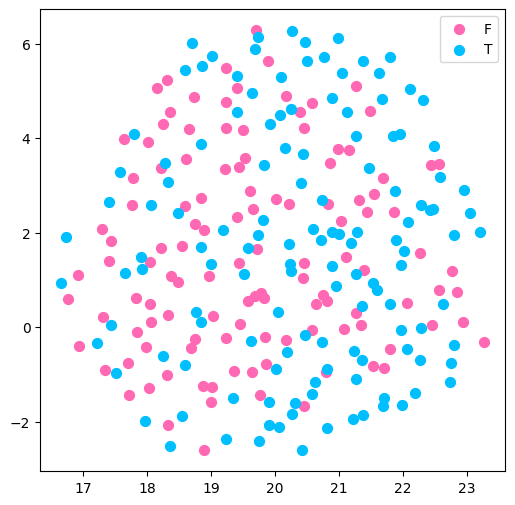

['D', 'C']


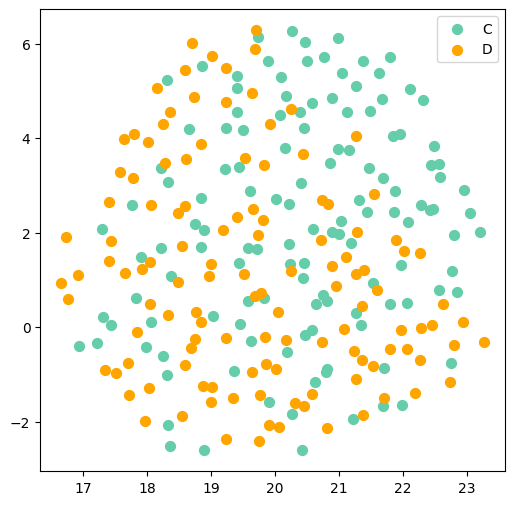

['TD', 'FC', 'TC', 'FD']


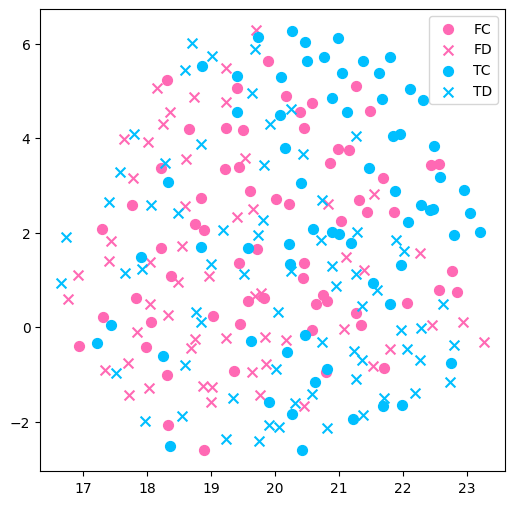

['N', 'B']


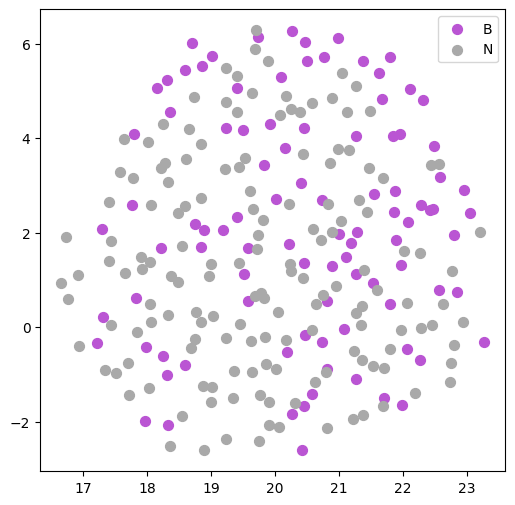

['TDB', 'TCN', 'TDN', 'TCB', 'FCN', 'FDB', 'FDN', 'FCB']


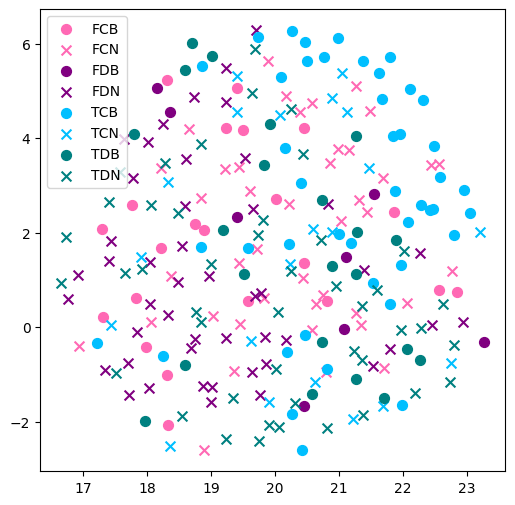

In [ ]:
'''Generate UMAP plots for all categories'''

categories = [
    'True or False', 'Confession or Denial', 'Label x2','Believed or Not',
              'Label x3']
for i, category in enumerate(categories):
  labels = list(set(data[category]))

  print(labels)

  colors = {
      'T': 'deepskyblue',
      'F': 'hotpink',
      'B': 'mediumorchid',
      'N': 'darkgray',
      'C': 'mediumaquamarine',
      'D': 'orange',
      'TC': 'deepskyblue',
      'FC': 'hotpink',
      'TD': 'teal',
      'FD': 'purple',
  }

  if len(labels[0]) > 1:
    markers = {
        'C': 'o',  # Circle
        'D': 'x',  # Triangle
        'B': 'o',
        'N': 'x',
    }


  # Create the plot
  plt.figure(figsize=(6, 6))

  # Plot each category with the specified color and marker
  for label in np.unique(labels):
      subset = embedding[data[category] == label]
      plt.scatter(subset[:, 0], subset[:, 1],
                  c=colors[label[:2]] if len(labels[0])>2 else colors[label[0]],
                  marker=markers[label[-1]] if len(labels[0])>1 else 'o',
                  label=label,
                  s=50)  # Adjust point size here

  # Add legend and title
  plt.legend()
  # plt.title(f'UMAP projection of the data based on {category}', fontsize=9)
  plt.savefig(f"drive/My Drive/master_thesis/umap_projection_all_cues_{i}.png")  # Problem: Crops axes labels for some reason. Solution: save plots from output here for use in paper.
  plt.show()

## Statistical evaluation

* Do statistical tests on the data to see which cues revealed *significant* differences between them
* Mann-Whitney U-tests for significance testing
* Correlation matrices with Pearson's correlation coefficient
* Variance Inflation Factor for extra correlation/collinearity control
* Multiple Logistic Regression (MLR) for coefficient analysis, classification performance, explanatory effect and confidence measures

### Correlation matrix with Pearson's

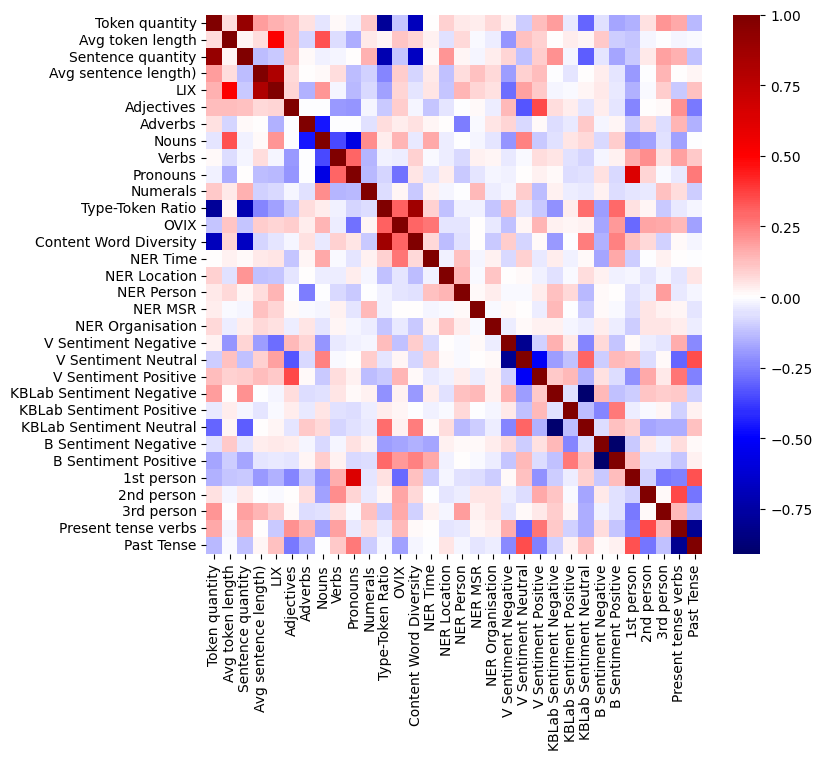

In [ ]:
#plotting correlation matrix
correlation_columns = scores.columns

df_with_values = data[correlation_columns]

matrix = df_with_values.corr()

# specify size
fig, ax = plt.subplots(figsize=(8, 7))

sns.heatmap(matrix, cmap='seismic', center=0, annot=False) # cmap='CMRmap'

fig.savefig("drive/My Drive/master_thesis/corr_all.png")

In [ ]:
# Multiply NER with 100 so the scores are higher -- done by Kleinberg et al. (2018), cause the frequencies are so small otherwise

data['NER Time'] = data['NER Time'] * 100
data['NER Location'] = data['NER Location'] * 100
data['NER Person'] = data['NER Person'] * 100
data['NER MSR'] = data['NER MSR'] * 100
data['NER Organisation'] = data['NER Organisation'] * 100

### Significance testing With Mann-Whitney tests

In [ ]:
# MANN-WHITNEY U
# Write code to test all cues and save into a pandas dataframe with mannwhitney u
from scipy.stats import ttest_ind, bartlett, mannwhitneyu, describe

alpha = 0.05

b_alpha = alpha/32

def statistical_u_test(data, scores, alpha, labels=list, category=str):
  '''Function that takes a category to inspect and returns a table of significance test results for each cue.'''

  results = []

  # Perform u-tests for each column of interest
  for cue in scores.columns:

    # array1, array2, dir_labels = get_values(data, cue, columns, labels)
    array1 = data[cue][data[category] == labels[0]]
    # print('array1', array1)
    array2 = data[cue][data[category] == labels[1]]
    # print('array2', array2)

    # Get mean and standard deviation for each array
    mean_1, st_dev_1 = describe(array1)[2], np.std(array1)
    mean_2, st_dev_2 = describe(array2)[2], np.std(array2)

    # print('stats', mean_1, st_dev_1)

    # Perform Mann-Whitney U-test
    u_statistic, p_value = mannwhitneyu(array1, array2)

    # Get direction of effect (DOE)
    u_less, p_less = mannwhitneyu(array1, array2, alternative='less')
    direction = '-'
    if p_value < alpha:
      if p_less < alpha:
        direction = labels[1]
      elif p_less > alpha:
        direction = labels[0]

    # Calculate sparsity (inspired by Kleinberg et al. 2018)
    combined_arrays = pd.concat([array1, array2])
    sparsity = 1-(sum([1 if elem > 0 else 0 for elem in combined_arrays]) /len(combined_arrays)) # % of zero counts

    # Set number of significance indicators*
    if p_value < b_alpha:
      n_stars = 2
    elif p_value < alpha:
      n_stars = 1
    else:
      n_stars = 0

    # Append results to the results list
    results.append({
        'Feature': cue+('*'*n_stars),
        # 'U-statistic': ("{:.3f}".format(u_statistic)+'*') if p_value < 0.05 else "{:.3f}".format(u_statistic), # t_statistic+'*' if p_value < 0.05
        'U-statistic': "{:.3f}".format(u_statistic),
        f'Mean {labels[0]} (SD)': "{:.3f}".format(mean_1)+f' ({"{:.3f}".format(st_dev_1)})',
        f'Mean {labels[1]} (SD)': "{:.3f}".format(mean_2)+f' ({"{:.3f}".format(st_dev_2)})',
        'p-value': "{:.3f}".format(p_value), #if t_statistic > 0 else 0})  # Append the T-test P_value
        'Indicative of': direction,      # 'Sparsity':  sparsity # % of zero counts
        'Sparsity': "{:.3f}".format(sparsity)
        })

  # Create a DataFrame from the results list
  results_df = pd.DataFrame(results)

  return results_df

In [ ]:
from IPython.display import display

categories = ['True or False', 'Label x2', 'Label x2', 'Believed or Not',
              # 'Label x3',
              'Gender',
              'Prolific or Normal',
              'Confession or Denial'
              ]

labels = [['T', 'F'],
          ['TC', 'FC'],
          ['TD', 'FD'],
          ['B', 'N'],
          ['Kvinna', 'Man'],
          ['PROLIFIC', 'NORMAL'],
          ['C', 'D'],
          ]

u_test_res_tot = []


# Get the results for all categories:
for i, cat in enumerate(categories):
  res = statistical_u_test(data, scores, alpha, category=cat, labels=labels[i])
  u_test_res_tot.append(res)

# Display all result dataframes for all cues
for i, result in enumerate(u_test_res_tot):
  display(result)
  filename = f'result_{i}.csv'
  result.to_csv(filename, encoding='iso-8859-1', sep=';')
  !cp result_* "drive/My Drive/master_thesis"


,Feature,U-statistic,Mean T (SD),Mean F (SD),p-value,Indicative of,Sparsity
0,Token quantity,8891.500,143.758 (112.131),121.076 (85.883),0.071,-,0.000
1,Avg token length,7992.000,3.882 (0.276),3.883 (0.285),0.811,-,0.000
2,Sentence quantity,8607.000,7.977 (6.637),6.630 (4.406),0.188,-,0.000
3,Avg sentence length),8047.000,19.078 (6.508),18.392 (5.680),0.737,-,0.000
4,LIX,8439.500,31.313 (7.667),30.046 (7.395),0.308,-,0.000
5,Adjectives,7026.500,0.032 (0.019),0.037 (0.022),0.150,-,0.108
6,Adverbs,6964.500,0.110 (0.043),0.120 (0.041),0.122,-,0.004
7,Nouns,8904.000,0.125 (0.037),0.114 (0.038),0.068,-,0.008
8,Verbs,7097.000,0.204 (0.029),0.209 (0.029),0.188,-,0.000
9,Pronouns,7968.000,0.152 (0.033),0.155 (0.038),0.843,-,0.000


,Feature,U-statistic,Mean TC (SD),Mean FC (SD),p-value,Indicative of,Sparsity
0,Token quantity,2370.500,183.246 (137.518),146.562 (83.450),0.172,-,0.000
1,Avg token length,2069.000,3.852 (0.240),3.872 (0.215),0.961,-,0.000
2,Sentence quantity,2445.000,10.462 (8.289),7.797 (4.774),0.085,-,0.000
3,Avg sentence length),1779.500,18.850 (6.747),19.689 (5.223),0.158,-,0.000
4,LIX,1871.000,31.152 (7.492),31.926 (6.544),0.326,-,0.000
5,Adjectives*,1592.000,0.031 (0.015),0.040 (0.021),0.022,FC,0.062
6,Adverbs,1833.500,0.103 (0.040),0.114 (0.040),0.247,-,0.008
7,Nouns,2192.000,0.122 (0.035),0.117 (0.034),0.599,-,0.000
8,Verbs,2343.500,0.212 (0.022),0.208 (0.026),0.215,-,0.000
9,Pronouns*,2506.000,0.166 (0.031),0.158 (0.029),0.045,TC,0.000


,Feature,U-statistic,Mean TD (SD),Mean FD (SD),p-value,Indicative of,Sparsity
0,Token quantity*,2273.500,105.448 (58.686),91.418 (78.867),0.027,TD,0.000
1,Avg token length,1921.000,3.911 (0.304),3.895 (0.349),0.688,-,0.000
2,Sentence quantity,2020.000,5.567 (2.887),5.273 (3.472),0.359,-,0.000
3,Avg sentence length),2223.000,19.300 (6.259),16.883 (5.816),0.051,-,0.000
4,LIX*,2320.500,31.469 (7.830),27.860 (7.720),0.014,TD,0.000
5,Adjectives,1879.500,0.033 (0.022),0.032 (0.023),0.851,-,0.156
6,Adverbs,1600.000,0.117 (0.044),0.128 (0.041),0.213,-,0.000
7,Nouns*,2254.500,0.129 (0.038),0.111 (0.041),0.034,TD,0.016
8,Verbs*,1303.500,0.195 (0.032),0.210 (0.032),0.006,FD,0.000
9,Pronouns,1670.000,0.140 (0.030),0.150 (0.046),0.376,-,0.000


,Feature,U-statistic,Mean B (SD),Mean N (SD),p-value,Indicative of,Sparsity
0,Token quantity**,9674.500,163.188 (121.797),114.310 (80.477),0.000,B,0.000
1,Avg token length,6588.500,3.845 (0.216),3.905 (0.311),0.128,-,0.000
2,Sentence quantity**,9557.000,9.083 (7.173),6.258 (4.270),0.000,B,0.000
3,Avg sentence length),7718.000,19.177 (6.441),18.491 (5.929),0.620,-,0.000
4,LIX,7337.500,30.839 (7.219),30.634 (7.772),0.855,-,0.000
5,Adjectives,8262.000,0.037 (0.020),0.033 (0.022),0.141,-,0.108
6,Adverbs,7353.500,0.115 (0.044),0.115 (0.041),0.878,-,0.004
7,Nouns,7521.000,0.121 (0.038),0.120 (0.038),0.885,-,0.008
8,Verbs,7749.000,0.206 (0.027),0.206 (0.030),0.581,-,0.000
9,Pronouns,8135.500,0.156 (0.030),0.152 (0.038),0.214,-,0.000


,Feature,U-statistic,Mean Kvinna (SD),Mean Man (SD),p-value,Indicative of,Sparsity
0,Token quantity,7945.500,140.092 (117.040),125.328 (82.522),0.639,-,0.000
1,Avg token length*,6552.000,3.852 (0.280),3.911 (0.280),0.046,Man,0.000
2,Sentence quantity,8112.000,7.783 (6.540),6.898 (4.836),0.443,-,0.000
3,Avg sentence length),7386.500,18.591 (6.637),18.810 (5.564),0.604,-,0.000
4,LIX,6601.000,29.995 (7.887),31.299 (7.139),0.056,-,0.000
5,Adjectives,6700.000,0.032 (0.020),0.036 (0.021),0.083,-,0.109
6,Adverbs,8208.500,0.116 (0.036),0.114 (0.047),0.350,-,0.004
7,Nouns,7253.000,0.117 (0.035),0.123 (0.040),0.450,-,0.008
8,Verbs,6698.000,0.203 (0.028),0.209 (0.030),0.082,-,0.000
9,Pronouns,7722.000,0.156 (0.039),0.152 (0.032),0.941,-,0.000


,Feature,U-statistic,Mean PROLIFIC (SD),Mean NORMAL (SD),p-value,Indicative of,Sparsity
0,Token quantity,6079.000,124.180 (91.239),150.548 (116.525),0.085,-,0.000
1,Avg token length*,8132.500,3.911 (0.290),3.826 (0.251),0.039,PROLIFIC,0.000
2,Sentence quantity*,5899.000,6.689 (4.712),8.631 (7.171),0.039,NORMAL,0.000
3,Avg sentence length),7721.000,18.940 (5.884),18.381 (6.601),0.193,-,0.000
4,LIX,7985.500,31.260 (7.261),29.623 (8.028),0.074,-,0.000
5,Adjectives,7202.500,0.034 (0.021),0.034 (0.020),0.729,-,0.108
6,Adverbs,6957.000,0.115 (0.044),0.115 (0.038),0.917,-,0.004
7,Nouns,7039.500,0.120 (0.038),0.120 (0.037),0.963,-,0.008
8,Verbs,7872.500,0.208 (0.030),0.202 (0.027),0.114,-,0.000
9,Pronouns,7384.500,0.154 (0.035),0.151 (0.036),0.495,-,0.000


,Feature,U-statistic,Mean C (SD),Mean D (SD),p-value,Indicative of,Sparsity
0,Token quantity**,11060.000,165.047 (115.413),99.123 (68.879),0.000,C,0.000
1,Avg token length,7356.500,3.862 (0.228),3.904 (0.325),0.373,-,0.000
2,Sentence quantity**,10805.000,9.140 (6.907),5.434 (3.167),0.000,C,0.000
3,Avg sentence length),8692.000,19.266 (6.054),18.210 (6.182),0.152,-,0.000
4,LIX,8691.000,31.536 (7.048),29.842 (7.985),0.153,-,0.000
5,Adjectives,8527.500,0.036 (0.019),0.033 (0.023),0.252,-,0.108
6,Adverbs*,6455.500,0.108 (0.040),0.122 (0.043),0.014,D,0.004
7,Nouns,7511.000,0.120 (0.035),0.121 (0.041),0.534,-,0.008
8,Verbs*,9545.500,0.210 (0.024),0.202 (0.033),0.004,C,0.000
9,Pronouns**,10858.000,0.162 (0.030),0.144 (0.039),0.000,C,0.000


In [ ]:
'''Extract significant cues for each comparison'''


def get_sign_cues(u_test_res_tot, idx_category=int):
  # print('Fetching significant cues for:', set(t_test_res_tot[idx_category]['Indicative of']))
  # print('CATEGORY:', list(grouping_dict.keys())[idx_category])
  significant_cues = []
  for row in u_test_res_tot[idx_category]['Feature']:
    if '**' in row:
      cue = row[:-2]
      significant_cues.append(cue)
      continue
    elif '*' in row:
      cue = row[:-1]
      significant_cues.append(cue)
  return significant_cues


significant_cues = []

for i in range(len(u_test_res_tot)):
  print(i, get_sign_cues(u_test_res_tot, i))
  significant_cues.append(get_sign_cues(u_test_res_tot, i))

0 ['Type-Token Ratio', 'Content Word Diversity', 'V Sentiment Positive', 'Present tense verbs', 'Past Tense']
1 ['Adjectives', 'Pronouns', 'Type-Token Ratio', 'OVIX', 'Content Word Diversity', 'V Sentiment Negative', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Tense']
2 ['Token quantity', 'LIX', 'Nouns', 'Verbs', 'Type-Token Ratio', 'Content Word Diversity', 'NER Person', 'Present tense verbs', 'Past Tense']
3 ['Token quantity', 'Sentence quantity', 'Type-Token Ratio', 'OVIX', 'Content Word Diversity', 'V Sentiment Negative', 'V Sentiment Neutral', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Present tense verbs', 'Past Tense']
4 ['Avg token length', 'OVIX', 'Content Word Diversity', 'V Sentiment Positive', 'Present tense verbs', 'Past Tense']
5 ['Avg token length', 'Sentence quantity', 'Content Word Diversity', 'V Sentiment Negative', 'Present tense verbs', 'Past Tense']
6 ['Token quantity', 'Sentence quantity', 'Adverbs', 'Verbs', 'Pronouns

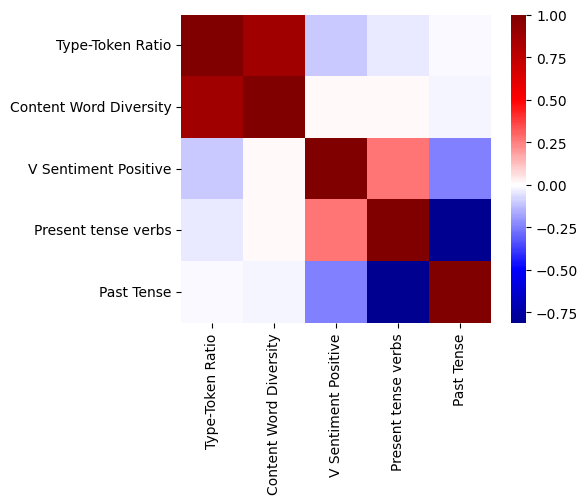

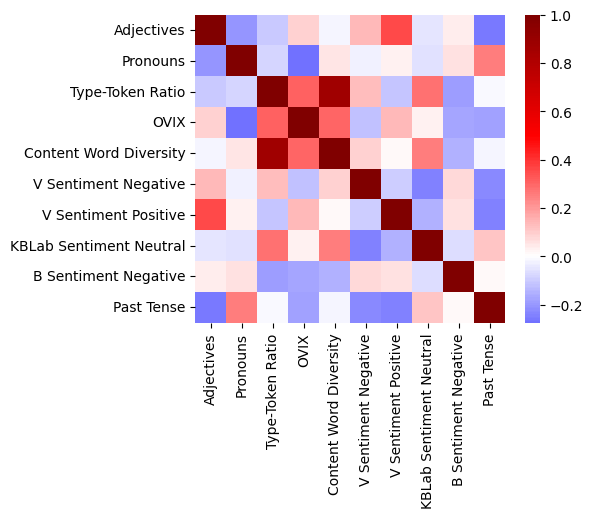

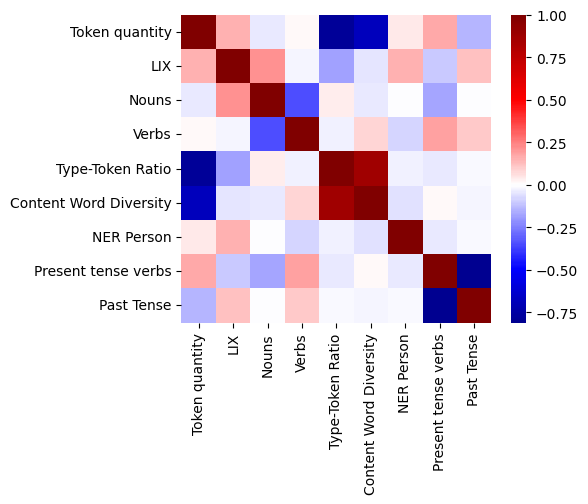

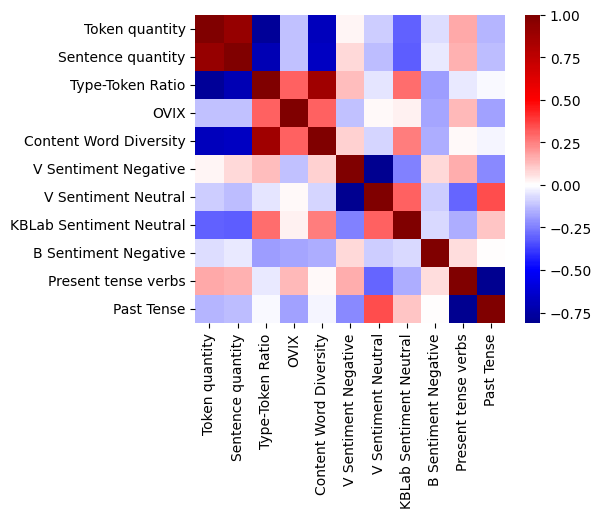

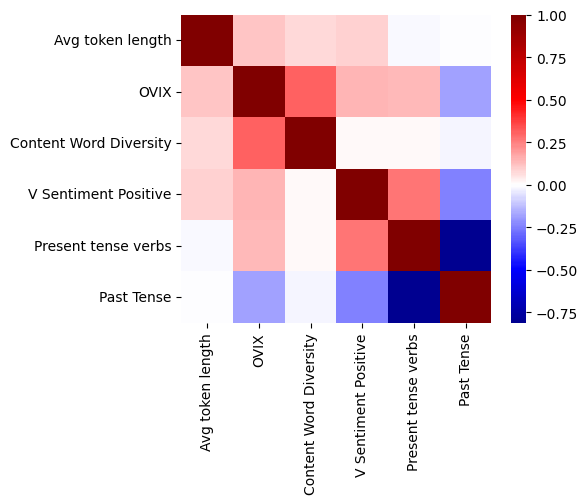

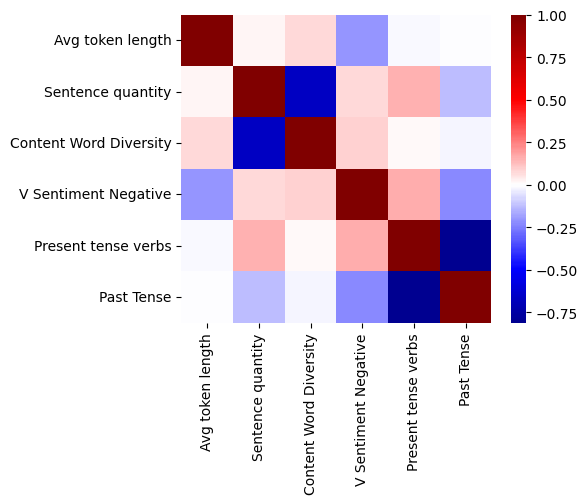

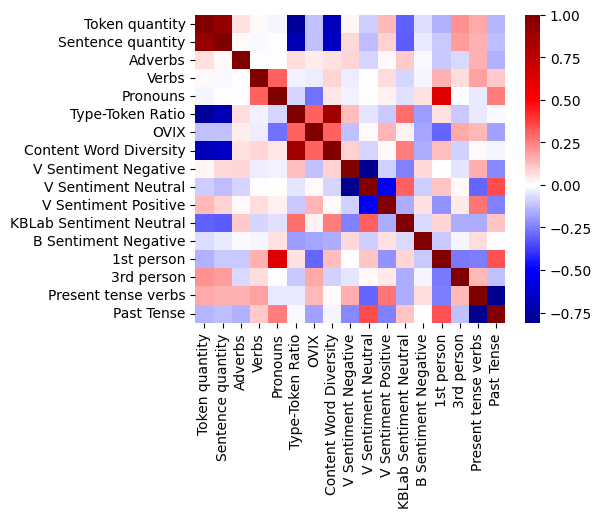

In [ ]:
'''Generate correlation matrices for significant cues for each category'''

for i, sign_cues in enumerate(significant_cues):

  #plotting correlation matrix
  correlation_columns = sign_cues

  df_with_values = data[correlation_columns]

  matrix = df_with_values.corr()

  # specify size
  fig, ax = plt.subplots(figsize=(5, 4))

  annot_or_not = True
  if len(sign_cues) > 4:
    annot_or_not = False

  sns.heatmap(matrix, cmap='seismic', center=0, annot=annot_or_not) # cmap='CMRmap'

  fig.savefig(f"drive/My Drive/master_thesis/corr_sign_{i}.png")

In [ ]:
'''Filter out those significant cues that are correlated with a Pearson coefficient above 0.40.

   Find pairs of significant cues that have a correlation score above 0.40.
   Remove the least significant out of these two.'''

remaining_cues = []

for i in range(len(significant_cues)):
  sus_cues = []
  good_cues = []
  for feature1 in significant_cues[i]:
    # print('feature1:', feature1)
    for feature2 in significant_cues[i]:
      if feature1 != feature2:
        # print('feature2:', feature2)
        correlation_columns = significant_cues[i]

        df_with_values = data[correlation_columns]

        matrix = df_with_values.corr()
        corr_value = matrix[feature1][feature2]
        # print('corr_value:', corr_value)
        if abs(corr_value) > 0.40:

          # Get p-value
          idx1 = [i for i, elem in enumerate(u_test_res_tot[0]['Feature']) if feature1 in u_test_res_tot[0]['Feature'][i]]
          idx2 = [i for i, elem in enumerate(u_test_res_tot[0]['Feature']) if feature2 in u_test_res_tot[0]['Feature'][i]]
          # print(idx1, idx2)

          # p1 = t_test_res_tot[0].at(idx1, 'p-value')
          p1 = float(u_test_res_tot[0].iloc[idx1]['p-value'])
          # print(f'idx2 {idx2}')
          p2 = float(u_test_res_tot[0].iloc[idx2]['p-value'])
          # print(p1)
          # print(p2)

          if p1 > p2:
            sus_cues.append(feature1)
          else:
            sus_cues.append(feature2)

  # print(i, set(sus_cues))
  good_cues = [cue for cue in significant_cues[i] if cue not in sus_cues]
  remaining_cues.append(good_cues)


print(remaining_cues)


<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p1 = float(u_test_res_tot[0].iloc[idx1]['p-value'])
<ipython-input-18-8c7101a6cba1>:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p2 = float(u_test_res_tot[0].iloc[idx2]['p-value'])
<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p1 = float(u_test_res_tot[0].iloc[idx1]['p-value'])
<ipython-input-18-8c7101a6cba1>:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p2 = float(u_test_res_tot[0].iloc[idx2]['p-value'])
<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on 

[['Content Word Diversity', 'V Sentiment Positive', 'Past Tense'], ['Adjectives', 'Pronouns', 'OVIX', 'Content Word Diversity', 'V Sentiment Negative', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Tense'], ['LIX', 'Nouns', 'Verbs', 'Content Word Diversity', 'NER Person', 'Past Tense'], ['OVIX', 'Content Word Diversity', 'V Sentiment Neutral', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Tense'], ['Avg token length', 'OVIX', 'Content Word Diversity', 'V Sentiment Positive', 'Past Tense'], ['Avg token length', 'Content Word Diversity', 'V Sentiment Negative', 'Past Tense'], ['Adverbs', 'Verbs', 'OVIX', 'Content Word Diversity', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'B Sentiment Negative', '1st person', '3rd person', 'Past Tense']]


<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p1 = float(u_test_res_tot[0].iloc[idx1]['p-value'])
<ipython-input-18-8c7101a6cba1>:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p2 = float(u_test_res_tot[0].iloc[idx2]['p-value'])
<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p1 = float(u_test_res_tot[0].iloc[idx1]['p-value'])
<ipython-input-18-8c7101a6cba1>:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  p2 = float(u_test_res_tot[0].iloc[idx2]['p-value'])
<ipython-input-18-8c7101a6cba1>:31: FutureWarning: Calling float on 

In [ ]:
'''Calculate VIF for the remaining significant cues'''

# Make a last assessment of correlation between cues to

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_tables = []

for i in range(len(remaining_cues)):
  # significant_cues_minus_corr = ['Content Word Diversity', 'Adv Density', 'V Sentiment Neutral', 'V Sentiment Compound']
  X = data[remaining_cues[i]]
  # X = data[significant_cues_minus_corr]
  # X = data[columns_of_interest]

  vif_data = pd.DataFrame()
  vif_data["Feature"] = X.columns

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  vif_tables.append(vif_data)
  # display(vif_data)

for i, vif in enumerate(vif_tables):
  display(vif)
  filename = f'vif_result_{i}.csv'
  vif.to_csv(filename, encoding='iso-8859-1', sep=';')
  !cp vif_result_* "drive/My Drive/master_thesis"

,Feature,VIF
0,Content Word Diversity,8.738244
1,V Sentiment Positive,2.181850
2,Past Tense,6.609322


,Feature,VIF
0,Adjectives,4.435615
1,Pronouns,21.735223
2,OVIX,12.885995
3,Content Word Diversity,59.126760
4,V Sentiment Negative,3.206603
5,V Sentiment Positive,2.797392
6,KBLab Sentiment Neutral,4.042730
7,B Sentiment Negative,16.918991
8,Past Tense,8.349532


,Feature,VIF
0,LIX,18.151104
1,Nouns,11.158402
2,Verbs,38.527842
3,Content Word Diversity,44.829166
4,NER Person,1.489920
5,Past Tense,7.017652


,Feature,VIF
0,OVIX,12.035012
1,Content Word Diversity,57.833008
2,V Sentiment Neutral,72.311046
3,KBLab Sentiment Neutral,3.620890
4,B Sentiment Negative,18.525116
5,Past Tense,8.076698


,Feature,VIF
0,Avg token length,65.029658
1,OVIX,11.824915
2,Content Word Diversity,65.264578
3,V Sentiment Positive,2.293227
4,Past Tense,7.350455


,Feature,VIF
0,Avg token length,61.612677
1,Content Word Diversity,62.118161
2,V Sentiment Negative,2.628321
3,Past Tense,6.968310


,Feature,VIF
0,Adverbs,8.341639
1,Verbs,45.825789
2,OVIX,13.131751
3,Content Word Diversity,68.085828
4,V Sentiment Positive,2.379799
5,KBLab Sentiment Neutral,3.771444
6,B Sentiment Negative,17.168015
7,1st person,16.330241
8,3rd person,1.467670
9,Past Tense,8.247214


correlation for True or False with labels ['T', 'F']
Remaining cues for 1 at step 0 ['Adjectives', 'Pronouns', 'OVIX', 'V Sentiment Negative', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Tense']
Remaining cues for 1 at step 1 ['Adjectives', 'OVIX', 'V Sentiment Negative', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Tense']
Remaining cues for 1 at step 2 ['Adjectives', 'OVIX', 'V Sentiment Negative', 'V Sentiment Positive', 'KBLab Sentiment Neutral', 'Past Tense']
correlation for Label x2 with labels ['TC', 'FC']
Remaining cues for 2 at step 0 ['LIX', 'Nouns', 'Verbs', 'NER Person', 'Past Tense']
Remaining cues for 2 at step 1 ['Nouns', 'Verbs', 'NER Person', 'Past Tense']
Remaining cues for 2 at step 2 ['Nouns', 'NER Person', 'Past Tense']
correlation for Label x2 with labels ['TD', 'FD']
Remaining cues for 3 at step 0 ['OVIX', 'Content Word Diversity', 'KBLab Sentiment Neutral', 'B Sentiment Negative', 'Past Ten

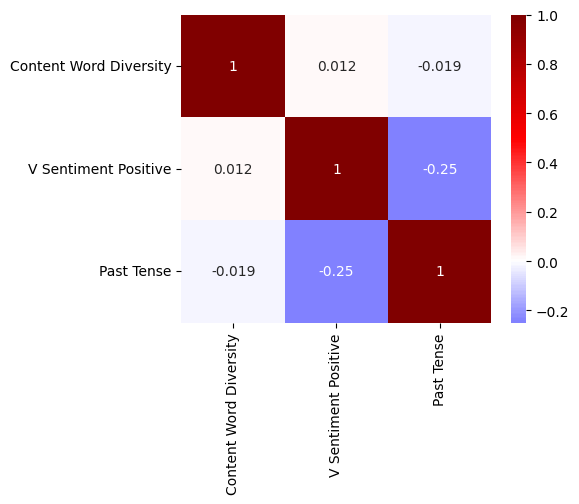

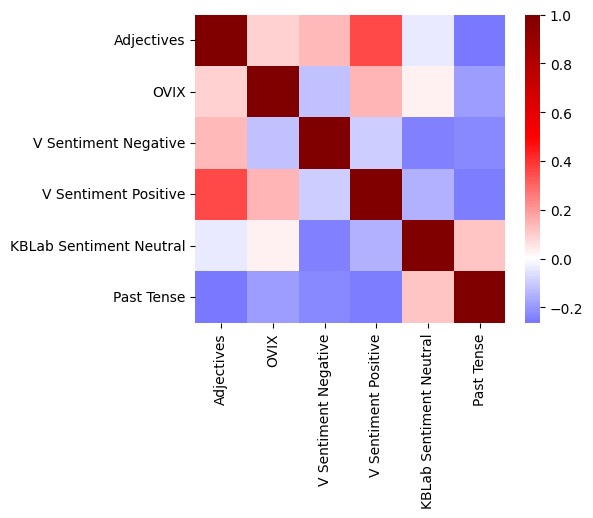

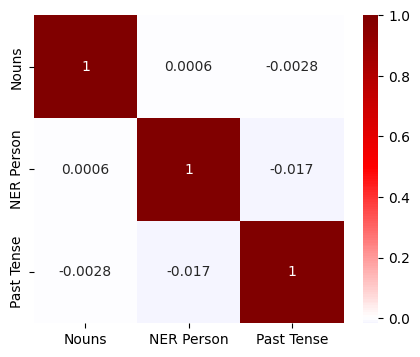

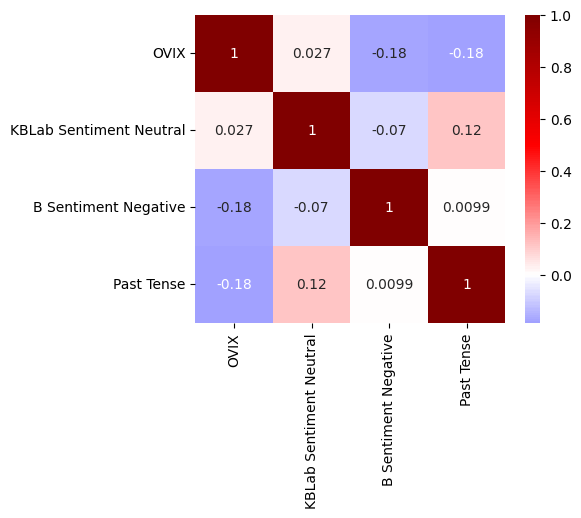

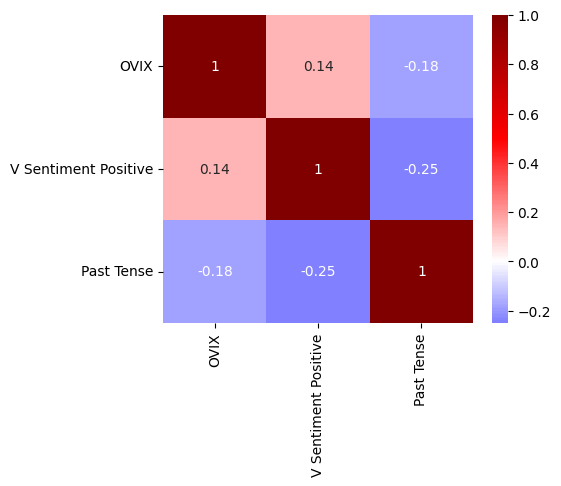

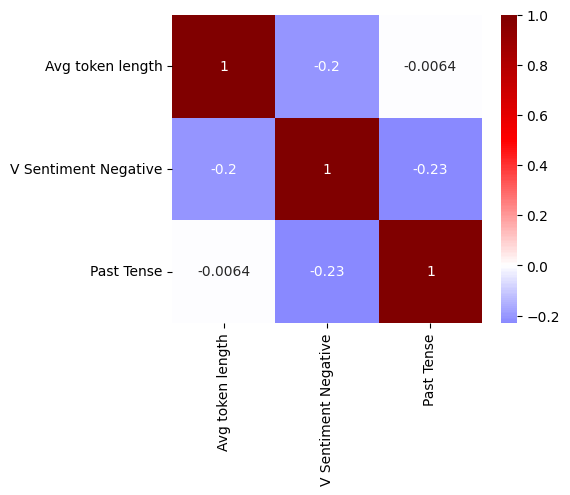

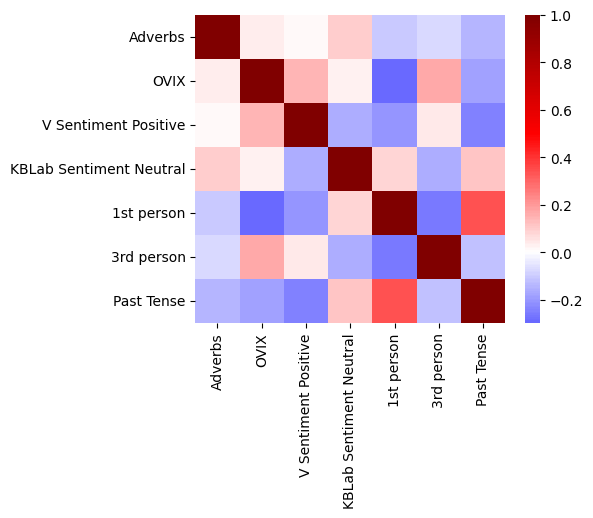

In [ ]:
'''Collinearity control: Remove the feature with the highest VIF, until all remaining cues have a VIF below the threshold of 10.'''

remaining_cues_for_mlr = []

for i in range(len(remaining_cues)):
  vif_threshold = 10  # VIF below this threshold are ok for regression

  remaining_cues_vif = remaining_cues[i]

  for f in range(len(remaining_cues_vif)):
    if max(vif_tables[i]['VIF']) > vif_threshold:
      remaining_cues_vif = [cue for j, cue in enumerate(vif_tables[i]["Feature"]) if vif_tables[i]['VIF'][j] < max(vif_tables[i]['VIF'])]
      print(f'Remaining cues for {i} at step {f}', remaining_cues_vif)
      X = scores[remaining_cues_vif]

      # Update VIF table:
      vif_tables_2 = pd.DataFrame()
      vif_tables_2['Feature'] = X.columns
      vif_tables_2['VIF'] = [variance_inflation_factor(X.values, u)
                            for u in range(len(X.columns))]
      vif_tables[i] = vif_tables_2


  remaining_cues_for_mlr.append(remaining_cues_vif)

  matrix2 = data[remaining_cues_vif].corr()

  annot_or_not = True
  if len(remaining_cues_vif) > 4:
    annot_or_not = False

  fig, ax = plt.subplots(figsize=(5, 4))
  sns.heatmap(matrix2, cmap='seismic', center=0, annot=annot_or_not) # cmap='CMRmap'

  print(f'correlation for {categories[i]} with labels {labels[i]}')

  fig.savefig(f"drive/My Drive/master_thesis/corr_matrix_sign_vif_{i}.png")
  fig.show()

In [ ]:
# print(remaining_cues)
for x in range(len(vif_tables)):
  display(vif_tables[x])

,Feature,VIF
0,Content Word Diversity,8.738244
1,V Sentiment Positive,2.181850
2,Past Tense,6.609322


,Feature,VIF
0,Adjectives,4.231679
1,OVIX,6.680577
2,V Sentiment Negative,2.315029
3,V Sentiment Positive,2.526318
4,KBLab Sentiment Neutral,3.250358
5,Past Tense,4.426252


,Feature,VIF
0,Nouns,4.702341
1,NER Person,1.414711
2,Past Tense,4.554699


,Feature,VIF
0,OVIX,6.610968
1,KBLab Sentiment Neutral,3.210425
2,B Sentiment Negative,9.298012
3,Past Tense,5.917292


,Feature,VIF
0,OVIX,4.932033
1,V Sentiment Positive,2.080827
2,Past Tense,3.749318


,Feature,VIF
0,Avg token length,9.281334
1,V Sentiment Negative,2.468943
2,Past Tense,6.879651


,Feature,VIF
0,Adverbs,6.781022
1,OVIX,7.947888
2,V Sentiment Positive,2.161410
3,KBLab Sentiment Neutral,3.476122
4,1st person,9.960084
5,3rd person,1.390154
6,Past Tense,7.330037


In [ ]:
'''Function to make the dependent variables numerical so that they can be used for regression analysis'''

def letter_to_num(string, label=list):
  if string in label[0]:
    return 1
  elif string in label[1]:
    return -1


### Multiple Logistic Regression

In [ ]:
from sklearn import linear_model

In [ ]:
'''Use scaled data for logistic regression'''
scores_labels_df = None
scaled_scores_df = pd.DataFrame.from_records(scaled_data, columns=scores.columns)
# scaled_scores_df[categories] = data[categories]
# for category in categories:
scores_labels_df = pd.concat((scaled_scores_df, data[list(set(categories))]), axis=1)
# scaled_scores_df
scores_labels_df.head()

,Token quantity,Avg token length,Sentence quantity,Avg sentence length),LIX,Adjectives,Adverbs,Nouns,Verbs,Pronouns,...,2nd person,3rd person,Present tense verbs,Past Tense,True or False,Prolific or Normal,Confession or Denial,Believed or Not,Gender,Label x2
0,-0.681989,-0.081860,-0.582761,-0.448468,-0.498950,1.354033,0.242371,0.961043,-1.718276,0.080018,...,1.324462,-0.553428,-0.520005,0.366229,F,PROLIFIC,C,B,Kvinna,FC
1,-0.563389,0.044354,-0.582761,0.040220,0.017135,1.511216,-0.845044,-0.394729,0.610577,0.126374,...,-0.477283,0.602164,1.250235,-0.957534,F,PROLIFIC,C,B,Man,FC
2,0.889461,0.772183,0.639090,0.247542,0.753886,-0.132507,0.573263,0.144991,0.938649,-0.153008,...,0.039810,-0.553428,-0.255037,0.278506,T,PROLIFIC,C,B,Man,TC
3,-0.533739,-0.122099,-0.408211,-0.481047,-0.967183,1.391836,1.176407,-1.174201,1.191531,0.314143,...,-0.477283,0.558281,-0.692608,0.684603,T,PROLIFIC,C,N,Man,TC
4,0.276694,0.264879,0.289990,-0.140776,-0.135125,1.929068,1.690650,-0.386036,-1.108280,0.227723,...,0.238939,-0.553428,0.197066,-0.067717,T,PROLIFIC,D,B,Kvinna,TD


['T', 'F']
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
Classification report:               precision    recall  f1-score   support

          -1       0.63      0.54      0.58       119
           1       0.63      0.72      0.67       132

    accuracy                           0.63       251
   macro avg       0.63      0.63      0.63       251
weighted avg       0.63      0.63      0.63       251


F1-scores: 0.673758865248227

 0.223736838203361
['TC', 'FC']
[LibLinear][Li

,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. T,avg. conf. F
0,Content Word Diversity,-0.485060,F,NaN,NaN,NaN,NaN
1,V Sentiment Positive,-0.331233,F,NaN,NaN,NaN,NaN
2,Past Tense,0.271228,T,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.673759,0.576966,0.571946,-0.584421


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. TC,avg. conf. FC
0,Adjectives,-0.263192,FC,NaN,NaN,NaN,NaN
1,OVIX,-0.078482,FC,NaN,NaN,NaN,NaN
2,V Sentiment Negative,0.215757,TC,NaN,NaN,NaN,NaN
3,V Sentiment Positive,-0.362649,FC,NaN,NaN,NaN,NaN
4,KBLab Sentiment Neutral,-0.162850,FC,NaN,NaN,NaN,NaN
5,Past Tense,0.141723,TC,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.661654,0.484349,0.465654,-0.505188


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. TD,avg. conf. FD
0,Nouns,0.418480,TD,NaN,NaN,NaN,NaN
1,NER Person,0.427311,TD,NaN,NaN,NaN,NaN
2,Past Tense,0.344522,TD,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.70073,0.590419,0.71197,-0.426794


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. B,avg. conf. N
0,OVIX,-0.229104,N,NaN,NaN,NaN,NaN
1,KBLab Sentiment Neutral,-0.358445,N,NaN,NaN,NaN,NaN
2,B Sentiment Negative,0.002276,B,NaN,NaN,NaN,NaN
3,Past Tense,0.332067,B,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.357143,0.599774,0.319252,-0.659402


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. Kvinna,avg. conf. Man
0,OVIX,-0.001880,Man,NaN,NaN,NaN,NaN
1,V Sentiment Positive,-0.002228,Man,NaN,NaN,NaN,NaN
2,Past Tense,0.002300,Kvinna,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.579592,0.003365,0.002965,-0.003772


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. PROLIFIC,avg. conf. NORMAL
0,Avg token length,0.284274,PROLIFIC,NaN,NaN,NaN,NaN
1,V Sentiment Negative,-0.205098,NORMAL,NaN,NaN,NaN,NaN
2,Past Tense,-0.296591,NORMAL,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.779156,0.746633,0.776997,-0.268898


,Feature,Coefficient,DOE,score,avg. confidence,avg. conf. C,avg. conf. D
0,Adverbs,-0.077132,D,NaN,NaN,NaN,NaN
1,OVIX,-0.089654,D,NaN,NaN,NaN,NaN
2,V Sentiment Positive,0.126214,C,NaN,NaN,NaN,NaN
3,KBLab Sentiment Neutral,-0.122497,D,NaN,NaN,NaN,NaN
4,1st person,0.107036,C,NaN,NaN,NaN,NaN
5,3rd person,0.034632,C,NaN,NaN,NaN,NaN
6,Past Tense,0.099222,C,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.714829,0.212985,0.21369,-0.212179


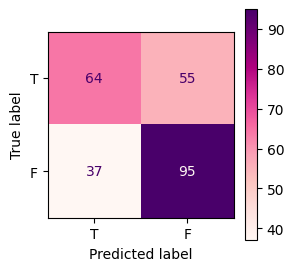

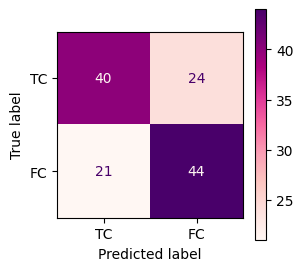

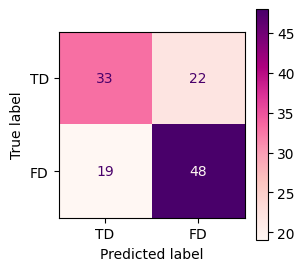

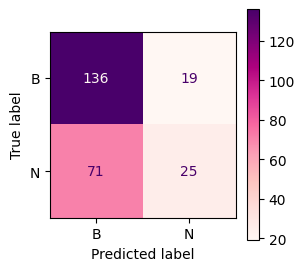

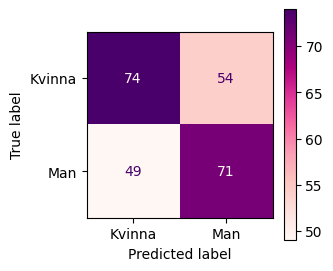

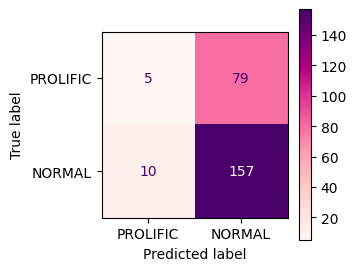

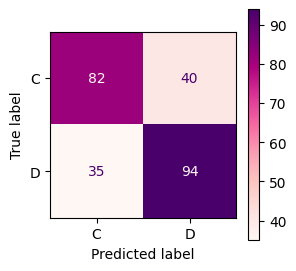

In [ ]:
# Get the data for the remaining cues after correlation analysis
from IPython.display import display
from sklearn import model_selection as ms
import sklearn.metrics as sm
all_results = []

for u, category in enumerate(categories):
  print(labels[u])
  data_1 = scores_labels_df[data[category] == labels[u][0]]
  # display(data_1)
  data_2 = scores_labels_df[data[category] == labels[u][1]]
  # display(data_2)

  data_for_mlr = pd.concat((data_1, data_2))
  # display(data_for_mlr)

  X = data_for_mlr[remaining_cues_for_mlr[u]]
  # display(data_for_mlr[category])

  # Try to do MLR with all cues:
  # X = scores_labels_df[data[labels[u] == labels[u]]]

  # X = data_for_mlr[scores.columns]

  y = data_for_mlr[category].apply(letter_to_num, label=labels[u])

  # Load model '''ATTEMPTING CROSS-VALIDATION NOW!'''
  log_reg = linear_model.LogisticRegressionCV(
                                              # cv=10,
                                              verbose=2,
                                              # scoring='roc_auc',
                                              # scoring='explained_variance',
                                              # scoring='r2',
                                              scoring='f1',
                                              # scoring='positive_likelihood_ratio',
                                              random_state=42,
                                              solver='liblinear'
                                              )

  # # Fit the hyperplane
  log_reg.fit(X, y)

  '''Print log_reg.coef_ to see how CV affects the structure of the results'''
  # print('Coefficients:', log_reg.coef_)
  # print('CV Folds:')
  # print('Cs_', log_reg.Cs_)
  # print('labels', log_reg.)
  # print('classes:', log_reg.classes_)
  # print('coefs_paths_', log_reg.coefs_paths_)
  # print('n_features_in_', log_reg.n_features_in_)
  # print('feature names', log_reg.feature_names_in_)
  # print('decision function output:', len(log_reg.decision_function(X)))
  # print('predict proba:', log_reg.predict_proba(X))

  confidence_scores = log_reg.decision_function(X)
  avg_confidence = np.mean([abs(elem) for elem in confidence_scores])
  avg_T_confidence = np.mean([elem for elem in confidence_scores if elem > 0])
  avg_F_confidence = np.mean([elem for elem in confidence_scores if elem < 0])

  # Scores per class:
  y_pred = log_reg.predict(X)
  y_pred_proba = log_reg.predict_proba(X)

  # cm = sm.confusion_matrix(y, y_pred)
  # print('\n', cm)
  fig, ax = plt.subplots(figsize=(3, 3))
  # plot_confusion_matrix(your_model, X_test, y_test, ax=ax)
  disp_cm = sm.ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='RdPu', display_labels=labels[u], ax=ax)
  # disp_cm.plot()
  # disp_cm.show()

  res_report = sm.classification_report(y, y_pred)
  print('\nClassification report:', res_report)
  f1_res = sm.f1_score(y, y_pred)
  print('\nF1-scores:', f1_res)


  # print('y', y)
  # print('y as np array', np.array(y))
  # print('X', X)
  # print('y_pred_proba', y_pred_proba)
  # print('y_proba[:, 1]', y_pred_proba[:, 1])
  brier_loss = sm.brier_score_loss(y, y_pred_proba[:, 1], pos_label=1)
  print('\n', brier_loss)

  results = []

  for j in range(len(remaining_cues_for_mlr[u])):
  # for j in range(len(scores.columns)):
    res1 = {
        'Feature': remaining_cues_for_mlr[u][j],
        # 'Feature': scores.columns[j],
        'Coefficient': log_reg.coef_[0][j],
        'DOE': f'{labels[u][0]}' if log_reg.coef_[0][j] > 0 else f'{labels[u][1]}',
        # 'VIF':
    }

    results.append(res1)

  # Other stats:
  res2 = {
    'score': log_reg.score(X, y),
    'avg. confidence': avg_confidence,
    f'avg. conf. {labels[u][0]}': avg_T_confidence,
    f'avg. conf. {labels[u][1]}': avg_F_confidence,
  }

  # print(results)

  mlr_res = pd.DataFrame(results)
  # display(mlr_res)
  mlr_res2 = pd.DataFrame(res2, index=(0,1))
  # display(mlr_res2)

  # concatenate into one df before saving
  combined_res = pd.concat((mlr_res, mlr_res2))
  combined_res = combined_res.iloc[:-1] # Remove the last line so the score and confidence is only shown once
  # display(combined_res)

  # Combine results to the same dataframe
  all_results.append(combined_res)

for i, result in enumerate(all_results):
  display(result)
  filename = f'mlr_result_{i}.csv'
  result.to_csv(filename, encoding='iso-8859-1', sep=';')
  !cp mlr_result_* "drive/My Drive/master_thesis"


### (UMAP) projections using significant cues



*   UMAP for those that have more than two dimensions
*   otherwise just normal plots



In [ ]:
categories = [
    'True or False', 'Confession or Denial', 'Label x2', 'Label x2', 'Believed or Not',
              # 'Label x3'
              ]

labels_all = [['T', 'F'],
          ['C', 'D'],
          ['TC', 'FC'],
          ['TD', 'FD'],
          ['B', 'N'],
          # ['Kvinna', 'Man'],
          # ['PROLIFIC', 'NORMAL'],
          # ['C', 'D'],
          ]


for i, category in enumerate(categories):

  print(remaining_cues_for_mlr[i])

  # Generate embedding if sign cues are more than 2
  if len(remaining_cues_for_mlr[i]) > 2:

    # Generate UMAP embeddings:
    # Set parameters:
    neigh = 60
    min = 0.8

    # Initialize umap reducer and fit it to the data to generate embeddings
    reducer = umap.UMAP(random_state = 42, n_components=2, n_epochs=1000, n_neighbors=neigh, min_dist=min, spread=1)
    embedding = reducer.fit_transform(scores_labels_df[remaining_cues_for_mlr[i]])
    embedding.shape

  else:
    embedding = scores_labels_df[remaining_cues_for_mlr[i]].to_numpy()
    # print(embedding)

  labels = labels_all[i]

  print(labels)

  colors = {
      'T': 'deepskyblue',
      'F': 'hotpink',
      'B': 'mediumorchid',
      'N': 'darkgray',
      'C': 'mediumaquamarine',
      'D': 'orange',
      'TC': 'deepskyblue',
      'FC': 'hotpink',
      'TD': 'teal',
      'FD': 'purple',
  }

  if len(labels[0]) > 1:
    markers = {
        'C': 'o',  # Circle
        'D': 'x',  # Triangle
        'B': 'o',
        'N': 'x',
    }


  # Create the plot
  plt.figure(figsize=(6, 6))

  # Plot each category with the specified color and marker
  for label in np.unique(labels):
      subset = embedding[data[category] == label]
      plt.scatter(subset[:, 0], subset[:, 1],
                  c=colors[label[:2]] if len(labels[0])>2 else colors[label[0]],
                  marker=markers[label[-1]] if len(labels[0])>1 else 'o',
                  label=label,
                  s=50)  # Adjust point size here

  # Add legend and title
  plt.legend()
  # plt.title(f'UMAP projection of the data based on {category}', fontsize=9)
  plt.savefig(f"drive/My Drive/master_thesis/umap_projection_best_sign_cues_{i}.png")  # Problem: Crops axes labels for some reason
  plt.show()

## Slask....

In [ ]:
'''Linear Regression'''

from sklearn import linear_model
    # What would be the benefit of having logistic regression?

X = data[remaining_cues_vif] # Take out the part of the data that reflects the sign cues
# X = data[columns_of_interest] # Include all data
y = data['True or False'].apply(letter_to_num) # Make the labels numerical

reg_model = linear_model.LinearRegression()
reg_model.fit(X, y)

# for i in range(len(remaining_cues_vif)):
#   print(remaining_cues_vif[i], ':', reg_model.coef_[i])
# # for i in range(len(columns_of_interest)):
# #   print(columns_of_interest[i], ':', reg_model.coef_[i])

# print(' ')
# print('get_params:', reg_model.get_params())
print('intercept:', reg_model.intercept_)
print('R2 (score)', reg_model.score(X, y))

# Create dataframe with results
LR_res = pd.DataFrame()

LR_res['Feature'] = remaining_cues_vif
LR_res['Coefficient'] = reg_model.coef_
LR_res['Indicative of'] = ['T' if coef > 0 else 'F' for coef in reg_model.coef_]
LR_res['VIF'] = vif_data2['VIF']

display(LR_res)

TypeError: argument of type 'types.GenericAlias' is not iterable

In [ ]:
'''Plot Pairplot for significant cues in MLR'''

# Make pairplot
# import seaborn as sns
# import matplotlib.pyplot as plt  # ALREADY IMPORTED


pairplot_data = pd.concat([data[remaining_cues_vif], data['True or False']], axis=1)
# print(pairplot_data)

sns.pairplot(pairplot_data, palette='Paired', hue='True or False', hue_order=['T', 'F'])
plt.show()

In [ ]:
'''Investigate pairplot_data'''

print(pairplot_data)

In [ ]:
'''Plot umap for significant cues in MLR'''

reducer = umap.UMAP(random_state =  42, n_components=3)

scaled_T_F_data = StandardScaler().fit_transform(pairplot_data[remaining_cues_vif])

In [ ]:
embedding = reducer.fit_transform(scaled_T_F_data)
embedding.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[sns.color_palette()[x] for x in data['Confession or Denial'].map({"C":0, "D":1})])

ax.set_title('UMAP projection using the most significant cues', fontsize=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     # embedding[:, 2],
#     c=[sns.color_palette()[x] for x in data['True or False'].map({"T":0, "F":1})])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the whole dataset', fontsize=24);

In [ ]:
'''Logistic Regression''' # apparently better when working with binary categorical dependent variables

X = data[remaining_cues_vif] # Take out the part of the data that reflects the sign cues
# X = data[columns_of_interest] # Include all data
y = data['True or False'].apply(letter_to_num) # Make the labels numerical

print('LOGISTIC REGRESSION analysis')
print(' ')
log_reg = linear_model.LogisticRegression(solver='liblinear')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
log_reg.fit(X, y)

print(log_reg.coef_)

for i in range(len(remaining_cues_vif)):
  print(remaining_cues_vif[i], ':', log_reg.coef_[0][i])

score = log_reg.score(X, y) # Not sure this makes sense...
print(' ')
print('score:', score)
print(' ')

# print(log_reg.decision_function(X))
confidence_scores = log_reg.decision_function(X)
avg_confidence = np.mean([abs(elem) for elem in confidence_scores])
avg_T_confidence = np.mean([elem for elem in confidence_scores if elem > 0])
avg_F_confidence = np.mean([elem for elem in confidence_scores if elem < 0])
print(f'Average Confidence: {avg_confidence}')
print(f'Avg. Confidence for True: {avg_T_confidence}')
print(f'Avg. Confidence for False: {avg_F_confidence}')

# Create dataframe with results
LogR_res = pd.DataFrame()

LogR_res['Feature'] = remaining_cues_vif
LogR_res['Coefficient'] = log_reg.coef_[0]
LogR_res['Indicative of'] = ['T' if coef > 0 else 'F' for coef in log_reg.coef_[0]]
LogR_res['VIF'] = vif_data2['VIF']

display(LogR_res)

In [ ]:
# Write code to test all cues and save into a pandas dataframe
from scipy.stats import ttest_ind, bartlett, mannwhitneyu, describe, normaltest
import numpy as np

alpha = 0.1

def statistical_test(data, columns=list, labels=list):
  '''Function that takes two arrays and a part of the data saved in "column_of_interest"
   performs a statistical test
   prints the results
   for all cues included in column_of_interest'''

  # array1, array2, dir_labels = get_values(data, cue, columns=['True or False'], labels=['T', 'F'])
  print('__________________________________________________')
  print('Results for', columns, 'with labels', labels)

  results = []

  # # Perform t-tests for each column of interest
  for cue in columns_of_interest:

    array1, array2, dir_labels = get_values(data, cue, columns, labels)

    # print('array1', array1)
    # print('array2', array2)
    # print('dir_labels', dir_labels)

    # Print intro statistics
    print('Cue:', cue)
    print('STATISTICS:')
    print('Description of array1', describe(array1))
    print('Description of array2', describe(array2))
    # print('Label', dir_labels[0], 'mean:', mean, 'std.dev.:', std_dev) # TODO: calculate mean and std.dev, maybe use old function above... No, it doesn't work with the double grouping

    # Perform equality of variance test Bartlett:
    b_statistic, b_p_value = bartlett(array1, array2)
    print('Bartlett results: b=', b_statistic, 'p=', b_p_value)

    # Normality test
    for i, array in enumerate([array1, array2]):
      n_statistic, n_p_value = normaltest(array)
      print(f'n_statistic for array{i+1}: {n_statistic}. With p-value: {n_p_value}')
      if n_p_value < 0.05:
        print('ALERT!!! NOT NORMAL!!!')

    # Perform t-test based on outcome from variance test:
    if b_p_value < 0.01:
      print("Welch's t-test:")
      t_statistic, p_value = ttest_ind(array1, array2, equal_var=True)
      welch = True
    else:
      print("Normal t-test:")
      t_statistic, p_value = ttest_ind(array1, array2, equal_var=False)
      welch = False

    # Display mean and stdev
    # print(display_mean_std(data, category=group_column, points=cue))
    print('T-statistic:', t_statistic)
    print('P-value:', p_value)
    if p_value < alpha:
      print(cue, 'is found significant')
    else:
      print(cue, 'is NOT significant')
      print("   ")

      # Direction / Indicative of
    # print('Time to find direction...')
    if p_value < alpha:
      # print('1')
      if t_statistic > 0:
        # print('2')
        direction = dir_labels[0]
      elif t_statistic < 0:
        # print('3')
        direction = dir_labels[1]
    else:
        # print('4')
        direction = '-'

    # Calculate sparsity (inspired by Kleinberg et al. 2018)
    combined_arrays = pd.concat([array1, array2])
    sparsity = 1-(sum([1 if elem > 0 else 0 for elem in combined_arrays]) /len(combined_arrays)) # % of zero counts
    # print('Sparsity:', sparsity)

      # Append results to the results list
    results.append({
        'Feature': cue+'*' if p_value < alpha else cue,
        'T-statistic': ("{:.3f}".format(t_statistic)+'ʷ') if welch else "{:.3f}".format(t_statistic), # t_statistic+'*' if p_value < 0.05
        'p-value': "{:.3f}".format(p_value), #if t_statistic > 0 else 0})  # Append the T-test P_value
        'Indicative of': direction,      # 'Sparsity':  sparsity
        'Sparsity': sparsity  # % of zero counts
        })

  # Create a DataFrame from the results list
  results_df = pd.DataFrame(results)

  # Display the results DataFrame
  # print(results_df)
  return results_df
  # return results_df


In [ ]:
# Print all results

tot_results = [] # Save results from all cues

def run_tests():
  for cue in columns_of_interest:
    array1, array2, dir_labels = get_values(data, cue, columns=['True or False'], labels=['T', 'F'])
    # print(statistical_test(array1, array2, dir_labels, cue))
    res = statistical_test()
    tot_results.append(res)

multiple_tests()

tot_results_df = pd.concat(tot_results)

print(tot_results_df)
# tot_results_df

In [ ]:
# check variance of the groups to decide what test to use

import statistics

def check_var(data, cue, group_column):

  # group_1 = data[data[group_column]=='T']
  # group_2 = data[data[group_column]=='F']

  group_1 = data[data[group_column] == (list(set(data[group_column])))[0]]
  group_2 = data[data[group_column] == (list(set(data[group_column])))[1]]

  variances = []

  for group in [group_1, group_2]:
    var = statistics.variance(group[cue])
    # print(group[cue])
    # print("Variance of group", "is:", var)
    variances.append(var)

  # apply rule of thumb - is the ratio of the variance between two samples less than 4, its ok
  if min(variances) > 0:
    thumb = max(variances)/min(variances)
  else:
    thumb = max(variances)-min(variances) # Don't know what to do here, there was zero variance in some groups...

  if thumb <= 4:
    print("T-test normal is fine")
    return 'T-test'
  else:
    print("Welch's")
    return "Welch's"


# check_var(data, cue='Content Word Diversity', group_column='Confession or Denial')

In [ ]:
# # write code to group the data based on two categories

# columns_of_interest = data.columns[8:]  # Assuming t-test starts from column 6 onwards

# # # # for cue in columns_of_interest:
# # # grouped = data.groupby(['True or False', 'Confession or Denial'])[cue]

# # # T_C_values = grouped.get_group(('T', 'C'))
# F_C_values = grouped.get_group(('F', 'C'))

# # T_D_values = grouped.get_group(('T', 'D'))
# # F_D_values = grouped.get_group(('F', 'D'))


# grouped = data.groupby(['True or False','Confession or Denial'])

# # print(grouped)

# # T_values = grouped.get_group(('T', 'C'))

# # print(T_values)
# # print(len(T_values))

# print(columns_of_interest)

# list_col = list(columns_of_interest)

# print(list_col)

In [ ]:
# T_C_values

In [ ]:
# Make plot for logistic regression plane

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap='Greens', label='Actual')

# Generate a meshgrid for plotting the decision boundary
x_surf, y_surf = np.meshgrid(np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100),
                             np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100))

# Predict probabilities for each point on the meshgrid
Z = log_reg.predict(np.c_[x_surf.ravel(), y_surf.ravel(), np.zeros_like(x_surf.ravel())])
Z = Z.reshape(x_surf.shape)

# Plot the decision boundary
ax.plot_surface(x_surf, y_surf, Z, cmap='coolwarm', alpha=0.5, label='Decision Boundary')

ax.set_xlabel(remaining_cues_vif[0])
ax.set_ylabel(remaining_cues_vif[1])
ax.set_zlabel(remaining_cues_vif[2])

plt.title('3D Scatter Plot with Logistic Regression Decision Boundary')
# plt.legend()
plt.show()

In [ ]:
# Remove cues that have too high VIF scores:

remaining_cues_for_mlr = []

for i in range(len(remaining_cues)):
  vif_threshold = 10  # VIF below this threshold are ok for regression

  remaining_cues_vif = [cue for j, cue in enumerate(vif_tables[i]["Feature"]) if vif_tables[i]['VIF'][j] < vif_threshold]
  remaining_cues_for_mlr.append(remaining_cues_vif)

  # print('Remaining after VIF analysis:')
  # print(remaining_cues_vif)

  X = scores[remaining_cues_vif]

  vif_data2 = pd.DataFrame()
  vif_data2["Feature"] = X.columns

  # calculating VIF for each feature
  vif_data2["VIF"] = [variance_inflation_factor(X.values, u)
                            for u in range(len(X.columns))]

  print('vif_data2')
  print(vif_data2)

  matrix2 = data[remaining_cues_vif].corr()

  # print('matrix2')
  # print(matrix2)

  fig, ax = plt.subplots(figsize=(5, 4))
  sns.heatmap(matrix2, cmap='seismic', center=0, annot=True) # cmap='CMRmap'
  # print('i', i)
  # print(categories)
  # print(labels[0])
  print(f'correlation for {categories[i]} with labels {labels[i]}')

  fig.savefig(f"drive/My Drive/master_thesis/corr_matrix_sign_vif_{i}.png")
  fig.show()